# Descriptives

In [1]:
# # only need to install this once, it's for some SPSSy stuff used in Psychology but not often used in Python
#!pip3 install psython
#!pip3 install pingouin
#!pip3 install prettytable
#!pip3 install factor_analyzer

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import numpy as np
import psython as psy
import pingouin as pg
from scipy.stats import contingency 
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import levene

In [3]:
df = pd.read_csv("final_cleaned.csv")

In [4]:
#removing time start column bc it is not necessary for analysis now
df = df.drop(columns = "timestart")

In [5]:
df.head()

,userid,satisfaction_1,satisfaction_2,satisfaction_3,satisfaction_4,satisfaction_5,satisfaction_6,credibility_1,credibility_2,credibility_3,...,condition,prolific,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge,device_type
0,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data,non-computer
1,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data,non-computer
2,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data,non-computer
3,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data,non-computer
4,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data,computer


In [6]:
df.shape

(65, 57)

In [7]:
df.columns

Index(['userid', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6', 'credibility_1',
       'credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12', 'motivation_1',
       'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5',
       'motivation_6', 'motivation_7', 'motivation_8', 'motivation_9',
       'motivation_10', 'motivation_11', 'motivation_12', 'anthropomorphism_1',
       'anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4',
       'control(reading_habits)', 'control(previous_experience_with_RS)',
       'conscientiousness_1', 'conscientiousness_2', 'conscientiousness_3',
       'conscientiousness_4', 'conscientiousness_5', 'age', 'gender', 'device',
       'education', 'time', 'condition', 'prolific', 'genre', 'consent',
       'mancheck1', 'manch

In [8]:
df["condition"].value_counts()

condition
1    42
0    23
Name: count, dtype: int64

<Axes: xlabel='condition', ylabel='count'>

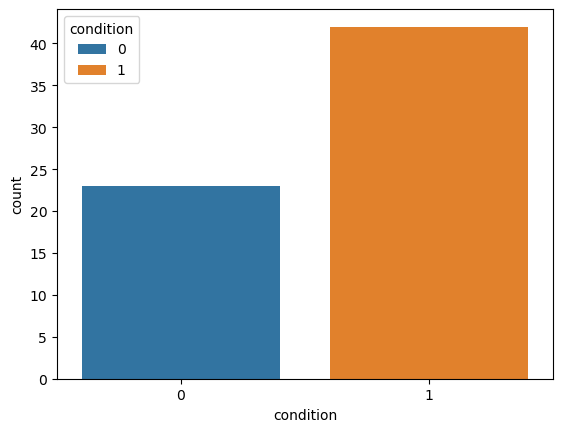

In [9]:
sns.countplot(data = df, x = "condition", hue = "condition")

In [10]:
df["genre"].value_counts()

genre
1.0    38
3.0    12
4.0     8
5.0     4
2.0     3
Name: count, dtype: int64

<Axes: xlabel='genre', ylabel='count'>

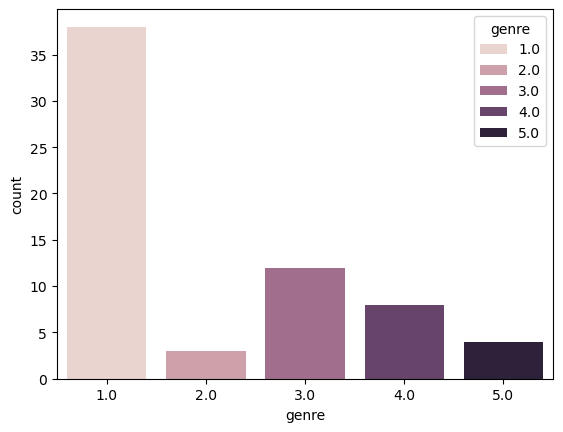

In [11]:
sns.countplot(data = df, x = "genre",  hue = "genre")

In [12]:
df["gender"].value_counts(normalize = True)*100

gender
1.0    73.846154
2.0    26.153846
Name: proportion, dtype: float64

In [13]:
df["gender"].value_counts()

gender
1.0    48
2.0    17
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

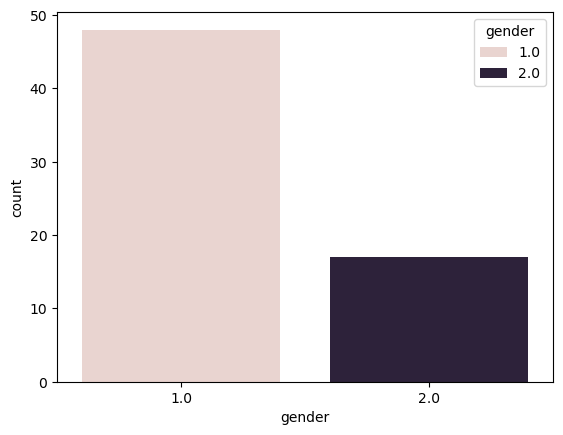

In [14]:
sns.countplot(data = df, x = "gender",  hue = "gender")

In [15]:
df["education"].value_counts()

education
2.0    40
4.0    14
5.0     9
3.0     1
1.0     1
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

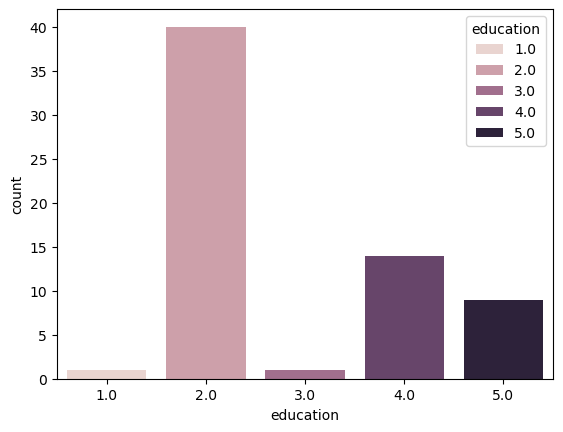

In [16]:
sns.countplot(data = df, x = "education",  hue = "education")

In [17]:
df["age"].describe()

count    65.000000
mean     29.200000
std      16.685697
min      18.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      74.000000
Name: age, dtype: float64

In [18]:
df["age"].value_counts().head(1)

age
20.0    18
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

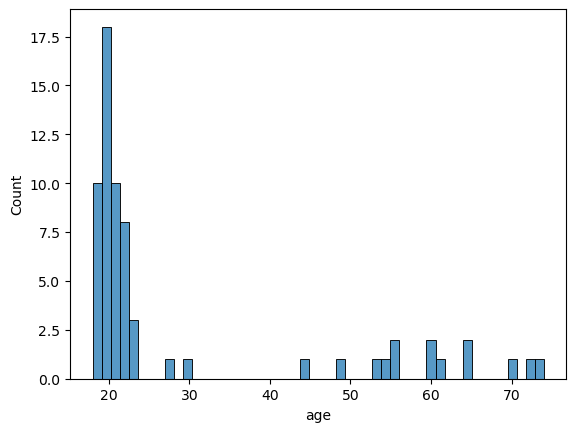

In [19]:
sns.histplot(data = df, x = "age", bins = 50)

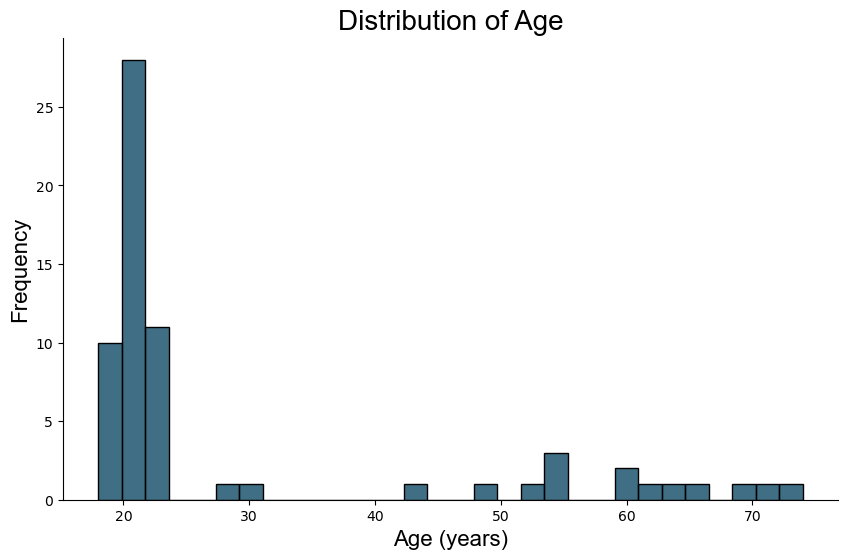

In [20]:
#save image to png code from here -> https://stackoverflow.com/questions/7906365/matplotlib-savefig-plots-different-from-show
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, color='#003f5c')
plt.title('Distribution of Age', font = "Arial", fontsize = 20)
plt.xlabel('Age (years)', font = "Arial", fontsize = 16)
plt.ylabel('Frequency', font = "Arial", fontsize = 16)

#https://seaborn.pydata.org/generated/seaborn.despine.html
sns.despine(top=True, right=True)
plt.grid(False)
plt.show()
fig.savefig('histogram_age.png', dpi=300)

In [21]:
df["device_type"].value_counts()

device_type
non-computer    58
computer         7
Name: count, dtype: int64

<Axes: xlabel='device_type', ylabel='count'>

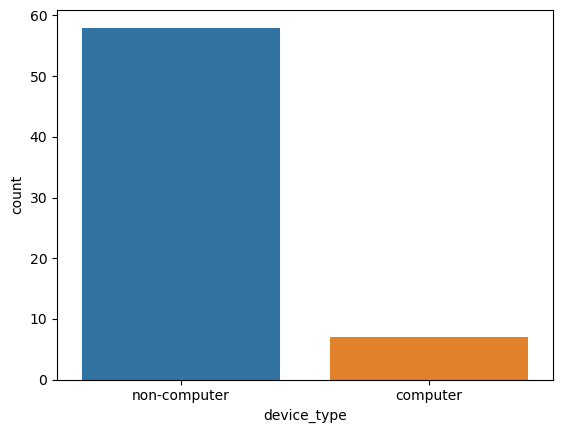

In [22]:
sns.countplot(data = df, x = "device_type", hue = "device_type")

# Check reliability (Cronbach's Alpha)

In [23]:
# Calculate the initial Cronbach's alpha
items = df[['satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6']]
pg.cronbach_alpha(items)

(0.951866315985229, array([0.931, 0.968]))

In [24]:
# calculate the alpha value without each item
alpha_deleted_items = []
for item in items.columns:
    reduced_data = items.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items.append((item, alpha))

for item, alpha in alpha_deleted_items:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: satisfaction_1
Cronbach's alpha: (0.9484138048076807, array([0.926, 0.966]))

Item removed: satisfaction_2
Cronbach's alpha: (0.944693844785852, array([0.92 , 0.963]))

Item removed: satisfaction_3
Cronbach's alpha: (0.9377523772306893, array([0.91 , 0.959]))

Item removed: satisfaction_4
Cronbach's alpha: (0.9442131902036031, array([0.919, 0.963]))

Item removed: satisfaction_5
Cronbach's alpha: (0.9419299912885088, array([0.916, 0.962]))

Item removed: satisfaction_6
Cronbach's alpha: (0.9393453503374355, array([0.912, 0.96 ]))



In [25]:
#making new variable
df['dv'] = df[['satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6']].mean(axis=1)

In [26]:
df["dv"].describe()

count    65.000000
mean      5.710256
std       1.228028
min       1.000000
25%       5.166667
50%       6.000000
75%       6.666667
max       7.000000
Name: dv, dtype: float64

In [27]:
#saving to csv

df.to_csv("analysis.csv", index = False)

# Randomization check - should NOT be sig

In [28]:
df = pd.read_csv("analysis.csv")

In [29]:
len(df)

65

## Gender

In [30]:
#let's look at the crosstab
mycrosstab = pd.crosstab(df['condition'], df["gender"])
mycrosstab

gender,1.0,2.0
condition,,
0,15,8
1,33,9


In [31]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# maybe Cramer's V as well?
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 0.768, p = 0.381 
V = 0.145


## Education

In [32]:
#let's look at the crosstab
mycrosstab = pd.crosstab(df['condition'], df["education"])
mycrosstab

education,1.0,2.0,3.0,4.0,5.0
condition,,,,,
0,1,14,1,2,5
1,0,26,0,12,4


In [33]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# maybe Cramer's V as well?
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(4) = 7.982, p = 0.092 
V = 0.350


## Age

In [34]:
(label1, values1), (label2, values2) = df.groupby('condition')['age']

testresult = pg.ttest(values1, values2)

print(f"We compare no delay = {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with delay = {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare no delay = 0 (M=31.52, SD=18.443) with delay = 1 (M=27.93, SD=15.277), t(38.38950800495643)=0.781, p=0.4395.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.781223,38.389508,two-sided,0.439463,"[-5.71, 12.9]",0.214815,0.34,0.128983


## Control variables - Reading freq

In [35]:
(label1, values1), (label2, values2) = df.groupby('condition')['control(reading_habits)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=4.22, SD=1.768) with 1 (M=4.21, SD=1.641), t(42.192386366028295)=0.007, p=0.9946.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.006813,42.192386,two-sided,0.994596,"[-0.92, 0.92]",0.001812,0.263,0.050005


## Control variables - Previous exp w/ RS (should be not sig)

In [36]:
(label1, values1), (label2, values2) = df.groupby('condition')['control(previous_experience_with_RS)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.991) with 1 (M=3.57, SD=1.941), t(44.0148213756047)=0.155, p=0.8777.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.154768,44.014821,two-sided,0.877712,"[-0.97, 1.13]",0.040574,0.266,0.052723


# Manipulation check -  mancheck1, mancheck2 (should BE sig)

## Mancheck 1

In [37]:
#let's look at the crosstab
mycrosstab = pd.crosstab(df['condition'], df["mancheck1"])
mycrosstab

mancheck1,0.0,1.0
condition,,
0,11,12
1,8,34


In [38]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# maybe Cramer's V as well?
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 4.640, p = 0.031 
V = 0.303


## Mancheck 2

In [39]:
(label1, values1), (label2, values2) = df.groupby('condition')['mancheck2']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.902) with 1 (M=4.12, SD=1.815), t(43.21900774469187)=-0.944, p=0.3506.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.943544,43.219008,two-sided,0.350648,"[-1.46, 0.53]",0.248922,0.382,0.156906


# Hypothesis 1

Levenes test should NOT be sig - there are equal variances

In [40]:
# Create three arrays for each sample:
group0 = df.query("condition == 0")['dv']
group1 = df.query("condition == 1")['dv']

In [41]:
# Levene's Test in Python with Scipy:
stat, p = levene(group0, group1)

print(stat, p)

1.1610965689576356 0.28534700344335034


t-test

In [42]:
(label1, values1), (label2, values2) = df.groupby('condition')['dv']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=5.68, SD=0.915) with 1 (M=5.73, SD=1.356), t(59.80999242820018)=-0.156, p=0.8763.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.156373,59.809992,two-sided,0.876265,"[-0.62, 0.53]",0.036387,0.266,0.052189


# Hypothesis 2

In [43]:
#creating groups for each condition
group0 = df.query("condition == 0 and device_type == 'computer'")['dv']

In [44]:
#checking it worked
group0

20    5.666667
54    6.500000
Name: dv, dtype: float64

In [45]:
df.iloc[20][["condition", "device_type"]]

condition             0
device_type    computer
Name: 20, dtype: object

In [46]:
#making the rest of the groups
group1 = df.query("condition == 0 and device_type == 'non-computer'")['dv']
group2 = df.query("condition == 1 and device_type == 'computer'")['dv']
group3 = df.query("condition == 1 and device_type == 'non-computer'")['dv']

In [47]:
#checking the rest
print(f"group 1: \n{group1[:3]}")
print(f"group 2: \n{group2[:3]}")
print(f"group 3: \n{group3[:3]}")

group 1: 
2    4.000000
7    4.000000
8    6.166667
Name: dv, dtype: float64
group 2: 
4     6.666667
15    5.333333
23    6.166667
Name: dv, dtype: float64
group 3: 
0    2.333333
1    7.000000
3    6.000000
Name: dv, dtype: float64


In [48]:
#checking it worked
print(f"group 1 (non computer, condition 0) \n{df.iloc[2][["condition", "device_type"]]}")
print("\n --------")
print(f"group 2 (computer, condition 1) \n{df.iloc[4][["condition", "device_type"]]}")
print("\n --------")
print(f"group 3 (non computer, condition 1) \n{df.iloc[0][["condition", "device_type"]]}")


group 1 (non computer, condition 0) 
condition                 0
device_type    non-computer
Name: 2, dtype: object

 --------
group 2 (computer, condition 1) 
condition             1
device_type    computer
Name: 4, dtype: object

 --------
group 3 (non computer, condition 1) 
condition                 1
device_type    non-computer
Name: 0, dtype: object


In [49]:
#worked! checking levene's test
stat, p = levene(group0, group1, group2, group3)

print(stat, p)

1.6749970830130416 0.18173912391686736


In [50]:
df.anova(dv="dv", between=["condition", "device_type"],effsize="n2").round(3)

,Source,SS,DF,MS,F,p-unc,n2
0,condition,0.015,1.0,0.015,0.010,0.922,0.00
1,device_type,1.008,1.0,1.008,0.644,0.425,0.01
2,condition * device_type,0.004,1.0,0.004,0.002,0.961,0.00
3,Residual,95.473,61.0,1.565,NaN,NaN,NaN


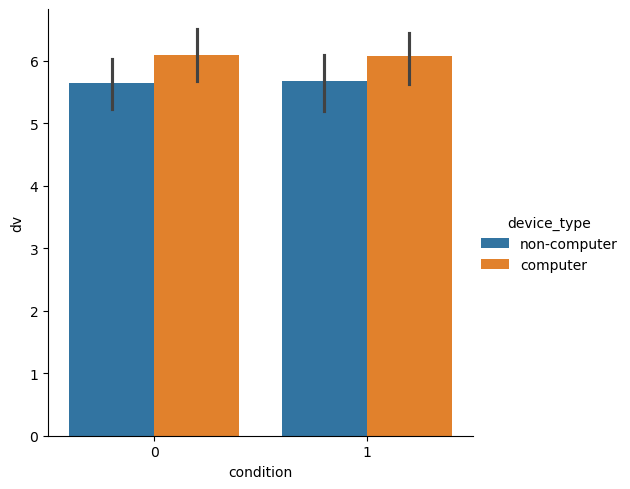

In [51]:
sns.catplot(x='condition', y='dv', hue='device_type', kind='bar', data=df)

In [52]:
#means of each condition
df.groupby(['condition', 'device_type']).dv.agg(['mean', 'std']).round(3)

mean    std
condition device_type               
0         computer      6.083  0.589
          non-computer  5.643  0.964
1         computer      6.067  0.480
          non-computer  5.680  1.449